In [ ]:
## Replace this with your name and Section

DS 256 Data Science Programming, Fall 2024

Prof Eatai Roth

## Problem Set 5
Due 11/14/2024 by 8p

## Titanic Pandas
(sounds cute...is not)

In this assignment, we'll explore the titanic training data set. These data represent a portion of the passenger manifest of the Titanic, detailing the passengers and whether or not they survived the fateful crash.

The columns are mostly self-explanatory. Key to less-obvious columns:
 - Sex - male=1 / female=0 
 - Parch - number of parents/children traveling with
 - SibSp - numbers of siblings/spouses traveling with
 - PClass - ticket class (like first class, business, economy)


 To start, you should import packages, ```pandas``` (as pd) and ```matplotlib.pyplot``` (as plt). Then load the data from ```titanic_train_clean.csv``` into a pandas dataframe.

 Feel free to add more code blocks if needed. When making figures, don't forget to label axes and provide titles and legends when appropriate.

In [15]:
# Add the boilerplate code for importing the required packages and data
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('titanic.csv')

print(data.head())



    Age Cabin Embarked     Fare  \
0  22.0   NaN        S   7.2500   
1  38.0   C85        C  71.2833   
2  26.0   NaN        S   7.9250   
3  35.0  C123        S  53.1000   
4  35.0   NaN        S   8.0500   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                           Allen, Mr. William Henry      0            5   

   Pclass  Sex  SibSp  Survived            Ticket Title  Family_Size  
0       3    1      1         0         A/5 21171    Mr            1  
1       1    0      1         1          PC 17599   Mrs            1  
2       3    0      0         1  STON/O2. 3101282  Miss            0  
3       1    0      1         1            11380

## Homework Problems

For each of the problems, you'll write some code to find the answer. If there is a written/short answer component, use the provided text field.

### Problem 1

 - How many passengers are recorded in this log?
 - What percentage are male?
 - What percentage survived?

Hint: You can find these three answers with a single command.

In [19]:
total_passengers = data.shape[0]
print('Total Passengers =', total_passengers)

Total Passengers = 891


In [21]:
Male_Percent = (data['Sex'].sum() / total_passengers) * 100
print('percent of male passengers =', Male_Percent)

percent of male passengers = 64.75869809203144


In [23]:
survived_percent = (data['Survived'].sum() / total_passengers) * 100
print('percentage of surviviors =', survived_percent)

percentage of surviviors = 38.38383838383838


Your written answer:

 - There were a total of 891 passengers.
 - The percentage of male passengers is 64.76%.
 - The percentage of survivors is 38.38 percent.

### Problem 2:

 - What percentage of female passengers survived?
 - What percentage of male passengers survived?

In [27]:
female_survival_rate = data[data['Sex'] == 0]['Survived'].mean() *100
print('Percentage of females who survived =', female_survival_rate)

Percentage of females who survived = 74.20382165605095


In [29]:
male_survival_rate = data[data['Sex'] ==1]['Survived'].mean() *100
print('percentage of males who survived =', male_survival_rate)

percentage of males who survived = 18.890814558058924


Your written answer:

 - 74.2% of females survived.
 - 18.9% of males survived.

### Problem 3

Use ```groupby``` and ```agg``` to find the percentage of the total tickets and the survivorship percentage for each class of ticket.

In [33]:
ticket_class = data.groupby('Pclass').agg(total_tickets = ('Pclass','size'),survival_rate = ('Survived','mean'))

In [35]:
ticket_class['percentage_of_total_tickets'] = (ticket_class['total_tickets'] / total_passengers)*100

In [37]:
ticket_class['survival_rate'] = ticket_class['survival_rate'] *100
print(ticket_class[['percentage_of_total_tickets','survival_rate']])

        percentage_of_total_tickets  survival_rate
Pclass                                            
1                         24.242424      62.962963
2                         20.650954      47.282609
3                         55.106622      24.236253


Your written answer:

 - Class 1 
    - % tickets: 24.24
    - % survivorship: 62.96
- Class 2 
    - % tickets: 20.65
    - % survivorship: 47.28
- Class 3
    - % tickets: 55.1
    - % survivorship: 24.23


### Problem 4

Create two new dataframes corresponding to survivors and non-survivors keeping only the columns: age, name, and sex. Display the first five rows of these new dataframes.

Create a figure showing the distribution of age by sex and survivorship (four histograms on the same axes: male-survivors, female-survivors, male-unlucky, female-unlucky). Choose colors and histtype (see the [documentation for histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)) to make this figure easy to read and interpret.

In [41]:
survivors_df = data[data['Survived'] == 1][['Age', 'Name','Sex']]
unluckey_df = data[data['Survived'] == 0][['Age','Name','Sex']]



print(survivors_df.head())
print(unluckey_df.head())

    Age                                               Name  Sex
1  38.0  Cumings, Mrs. John Bradley (Florence Briggs Th...    0
2  26.0                             Heikkinen, Miss. Laina    0
3  35.0       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0
8  27.0  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)    0
9  14.0                Nasser, Mrs. Nicholas (Adele Achem)    0
    Age                            Name  Sex
0  22.0         Braund, Mr. Owen Harris    1
4  35.0        Allen, Mr. William Henry    1
5  30.0                Moran, Mr. James    1
6  54.0         McCarthy, Mr. Timothy J    1
7   2.0  Palsson, Master. Gosta Leonard    1


<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

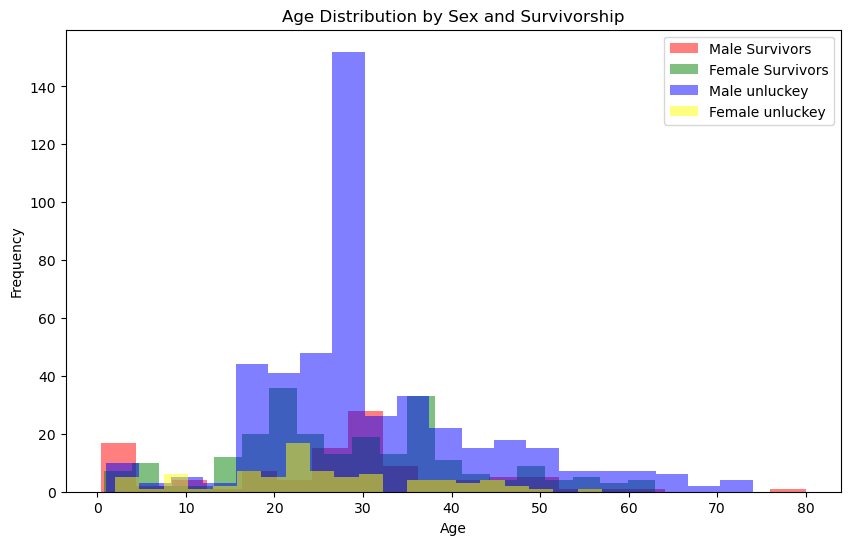

In [43]:
plt.figure(figsize=(10,6))
plt.hist(survivors_df[survivors_df['Sex']==1]['Age'], bins=20, color='red',alpha=0.5,label= 'Male Survivors',histtype='stepfilled')
plt.hist(survivors_df[survivors_df['Sex']==0]['Age'], bins=20, color='green',alpha=0.5,label= 'Female Survivors',histtype='stepfilled')
plt.hist(unluckey_df[unluckey_df['Sex']==1]['Age'], bins=20, color='blue',alpha=0.5,label='Male unluckey',histtype='stepfilled')
plt.hist(unluckey_df[unluckey_df['Sex']==0]['Age'], bins=20, color='yellow',alpha=0.5,label='Female unluckey',histtype='stepfilled')

plt.title('Age Distribution by Sex and Survivorship')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()

plt.legend

### Problem 5

Now that we've inspected the data, let's build a classifier (you'll compare two models) that predicts which passengers survived. These are the steps you should take:

 - Choose your features. The label will be survivorship.
 - Split the data into training and test sets.
 - Standardize the values using StandardScaler
 - Choose two of the following model types: KNN, SVM, Decision Tree. Create those models and select hyper-parameters.
 - Fit your models to the training data.
 - Apply the fit models to create predictions from the test data.
 - For each model, create a confusion matrix for the training and test data. You may want to revisit the hyper-parameters and re-fit the models.

 - Answer the questions at the bottom of the code block.

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

features = data[['Pclass','Sex','Age','SibSp','Parch']].fillna(data[['Pclass','Sex','Age','SibSp','Parch']].median())
label = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=42)

In [49]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn_model = KNeighborsClassifier(n_neighbors=5)
svm_model = SVC(kernel='linear', C=1)

knn_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)

KNN Model
Training KNN =


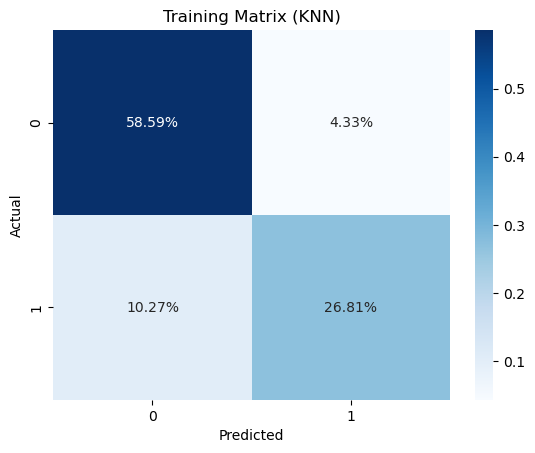

Test KNN =


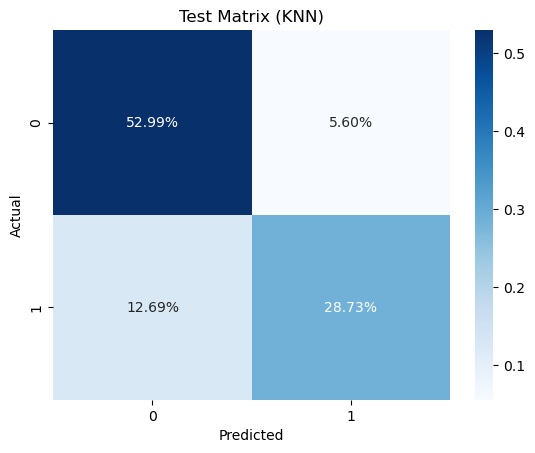

SVM Model
Training Confusion Matrix (SVM) =


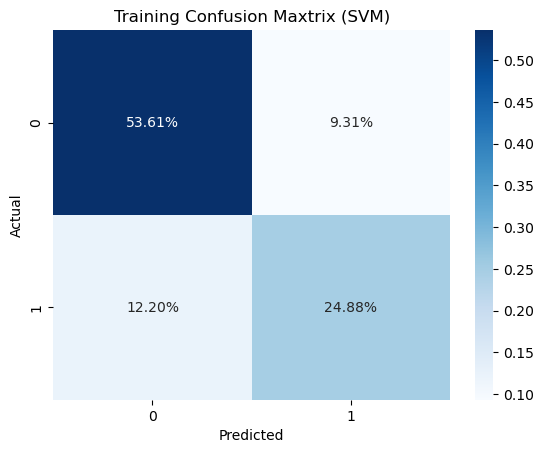

Test Confusion Matrix (SVM)=


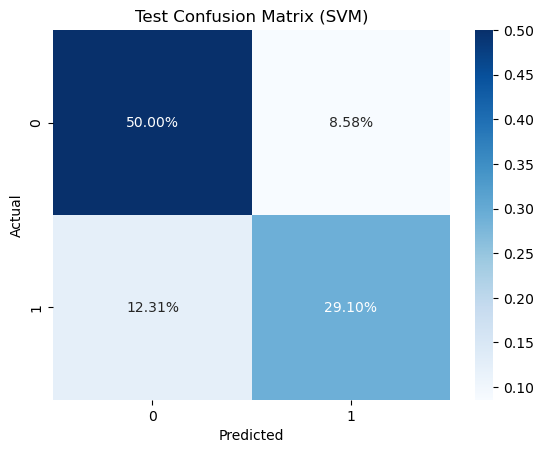

In [72]:
def plot_confusion_matrix(cm, title):
    sns.heatmap(cm, annot=True, fmt='0.2%', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

print('KNN Model')
train_cm_knn = confusion_matrix(y_train, knn_model.predict(X_train), normalize='all' )
test_cm_knn = confusion_matrix(y_test,knn_predictions, normalize='all')
print('Training KNN =')
plot_confusion_matrix(train_cm_knn, 'Training Matrix (KNN)')
print('Test KNN =')
plot_confusion_matrix(test_cm_knn, 'Test Matrix (KNN)')

print('SVM Model')
train_cm_svm = confusion_matrix(y_train, svm_model.predict(X_train), normalize='all')
test_cm_svm = confusion_matrix(y_test, svm_predictions, normalize='all')
print('Training Confusion Matrix (SVM) =')
plot_confusion_matrix(train_cm_svm, 'Training Confusion Maxtrix (SVM)')
print('Test Confusion Matrix (SVM)=')
plot_confusion_matrix(test_cm_svm, 'Test Confusion Matrix (SVM)')

#### **Questions**

How does the model performance on the test data compare to the performance on the training data? 
 
 - The training data outperformed the test data in both models.


Which models did you fit and which worked better?
 
 - I used the KNN model and the SVM model. The KNN model was more accurate!